#Model and Preoprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/NUS/IT5006/

Mounted at /content/drive
/content/drive/My Drive/NUS/IT5006


In [3]:
nibrs_fe = pd.read_csv('NIBRS_after_FE.csv')
nibrs_fe.head()

<ipython-input-3-255e353936a7>:1: DtypeWarning: Columns (8,9,10,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  nibrs_fe = pd.read_csv('NIBRS_after_FE.csv')


,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,incident_date,incident_hour,incident_status,arrestee_id,arrest_date,multiple_indicator,...,UNIFIED_LOCATION_CODE,date,month,day,hour,weekday,is_weekend,is_holiday,New_offense_category_name,arrest
0,4675,169368274,44493177,f,2023-01-19,21,ACCEPTED,51253221.0,2023-01-19 00:00:00,N,...,1,2023-01-19 21:00:00,1,19,21,3,0,0,Assault Offenses,True
1,4675,169368295,44493179,f,2023-02-08,18,ACCEPTED,51253236.0,2023-02-08 00:00:00,N,...,1,2023-02-08 18:00:00,2,8,18,2,0,0,Destruction/Damage/Vandalism of Property,True
2,4675,172820689,44525191,f,2023-04-13,13,ACCEPTED,52245171.0,2023-04-13 00:00:00,N,...,1,2023-04-13 13:00:00,4,13,13,3,0,0,Assault Offenses,True
3,4675,172820694,44525191,f,2023-04-13,21,ACCEPTED,52245172.0,2023-04-13 00:00:00,N,...,2,2023-04-13 21:00:00,4,13,21,3,0,0,Drug/Narcotic Offenses,True
4,4675,187560794,44525192,f,2023-05-20,15,ACCEPTED,57077143.0,2023-05-20 00:00:00,N,...,1,2023-05-20 15:00:00,5,20,15,5,1,0,Assault Offenses,True


In [4]:
chicago_fe = pd.read_csv('Chicago_after_FE.csv')
chicago_fe.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,unified_location_category,UNIFIED_LOCATION_CODE,month,day,hour,weekday,is_weekend,is_holiday,crime_against,offense_category_name
0,13777896,JJ183487,2025-03-16 03:00:00,040XX N KEYSTONE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,Residence,1,3,16,3,6,1,0,Person,Assault Offenses
1,13776543,JJ182816,2025-03-12 00:00:00,037XX W NORTH AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,Street/Outdoor,2,3,12,0,2,0,0,Property,Larceny/Theft Offenses
2,13772937,JJ178623,2025-03-12 00:00:00,076XX S EAST END AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,Unknown/Other,10,3,12,0,2,0,0,Property,Fraud Offenses
3,13774108,JJ179898,2025-03-12 00:00:00,097XX S MERRILL AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,Street/Outdoor,2,3,12,0,2,0,0,Property,Larceny/Theft Offenses
4,13772980,JJ178262,2025-03-12 00:00:00,095XX S HALSTED ST,0560,ASSAULT,SIMPLE,LIBRARY,False,False,...,Unknown/Other,10,3,12,0,2,0,0,Person,Assault Offenses


In [5]:
# prompt: list of column of chicago_fe and nibrs_fe

print(list(chicago_fe.columns))
print(list(nibrs_fe.columns))


['id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location', 'unified_location_category', 'UNIFIED_LOCATION_CODE', 'month', 'day', 'hour', 'weekday', 'is_weekend', 'is_holiday', 'crime_against', 'offense_category_name']
['agency_id', 'incident_id', 'nibrs_month_id', 'cargo_theft_flag', 'incident_date', 'incident_hour', 'incident_status', 'arrestee_id', 'arrest_date', 'multiple_indicator', 'offense_code', 'age_num', 'sex_code', 'race_id', 'ethnicity_id', 'arrest_type_name', 'attempt_complete_flag', 'location_id', 'num_premises_entered', 'method_entry_code', 'offense_name', 'crime_against', 'offense_category_name', 'offense_group', 'location_code', 'location_name', 'unified_location_category', 'UNIFIED_LOCATION_CODE', 'date', 'month', 'day', 'hour', 'weekday', 'is_weekend', 'is_h

In [6]:

# Check Date Range
c_min_date = chicago_fe['date'].min()
c_max_date = chicago_fe['date'].max()
n_min_date = nibrs_fe['date'].min()
n_max_date = nibrs_fe['date'].max()
print(f"Chicago Dataset Date Range: {c_min_date} to {c_max_date}")
print(f"NIBRS Dataset Date Range: {n_min_date} to {n_max_date}")

Chicago Dataset Date Range: 2020-07-31 17:29:00 to 2025-03-16 03:00:00
NIBRS Dataset Date Range: 2023-01-01 00:00:00 to 2023-12-31 23:00:00


In [7]:
chicago_fe['date'] = pd.to_datetime(chicago_fe['date'])
# Choose data from 2021-01-01 to 2022-12-31 for model training and initial testing
filtered_chicago_df = chicago_fe[(chicago_fe['date'] >= '2021-01-01') & (chicago_fe['date'] <= '2022-12-31')]

print(f"Chicago Dataset Date Range After Filtering: {filtered_chicago_df['date'].min()}, {filtered_chicago_df['date'].max()}")


Chicago Dataset Date Range After Filtering: 2021-01-01 00:00:00, 2022-12-31 00:00:00


In [8]:
chicago_fe = filtered_chicago_df
print("Chicago dataset shape:", chicago_fe.shape)


Chicago dataset shape: (448489, 32)


In [9]:
print("NIBRS dataset shape:",nibrs_fe.shape)


NIBRS dataset shape: (562976, 37)


In [10]:
feature_columns = [
    'arrest', 'UNIFIED_LOCATION_CODE', 'month', 'day', 'hour', 'weekday',
    'is_weekend', 'is_holiday', 'crime_against', 'offense_category_name'
]

chicago_df = chicago_fe[feature_columns]

In [11]:
# handle missing value
print(chicago_df.isnull().sum())
chicago_df = chicago_df.dropna()
print(chicago_df.isnull().sum())

arrest                   0
UNIFIED_LOCATION_CODE    0
month                    0
day                      0
hour                     0
weekday                  0
is_weekend               0
is_holiday               0
crime_against            0
offense_category_name    0
dtype: int64
arrest                   0
UNIFIED_LOCATION_CODE    0
month                    0
day                      0
hour                     0
weekday                  0
is_weekend               0
is_holiday               0
crime_against            0
offense_category_name    0
dtype: int64


In [12]:
# Check data types of all columns
print(chicago_df.dtypes)

# Check for non-numeric columns
non_numeric_columns = chicago_df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)

arrest                     bool
UNIFIED_LOCATION_CODE     int64
month                     int64
day                       int64
hour                      int64
weekday                   int64
is_weekend                int64
is_holiday                int64
crime_against            object
offense_category_name    object
dtype: object
Index(['arrest', 'crime_against', 'offense_category_name'], dtype='object')


In [13]:
label_encoder = LabelEncoder()
chicago_df['crime_against']= label_encoder.fit_transform(chicago_df['crime_against'])
chicago_df['offense_category_name']= label_encoder.fit_transform(chicago_df['offense_category_name'])

In [14]:
X = chicago_df.drop(columns=['arrest'])
y = chicago_df['arrest']

# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
y_test.isna().sum()

np.int64(0)

In [16]:
# prompt: y_train.value_counts() show as percent

y_train_counts = y_train.value_counts(normalize=True) * 100
y_train_counts


,proportion
arrest,
False,87.814912
True,12.185088


In [17]:
y_test.value_counts(normalize=True) * 100

,proportion
arrest,
False,87.814667
True,12.185333


##Model Trining

* Random forests are great for handling imbalanced datasets.


* Set class_weight='balanced' to handle the imbalance by adjusting the weight of the classes in the tree.



In [18]:
# Handle class imbalance using SMOTE ONLY on the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [19]:
# Initialize and train your model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predict and evaluate on the unmodified test set
y_pred = rf_model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.87      0.90     78768
        True       0.37      0.55      0.44     10930

    accuracy                           0.83     89698
   macro avg       0.65      0.71      0.67     89698
weighted avg       0.86      0.83      0.84     89698

[[68493 10275]
 [ 4917  6013]]


#Test by NIBRS

In [20]:
nibrs_fe = nibrs_fe[feature_columns]
nibrs_fe.head()

,arrest,UNIFIED_LOCATION_CODE,month,day,hour,weekday,is_weekend,is_holiday,crime_against,offense_category_name
0,True,1,1,19,21,3,0,0,Person,Assault Offenses
1,True,1,2,8,18,2,0,0,Property,Destruction/Damage/Vandalism of Property
2,True,1,4,13,13,3,0,0,Person,Assault Offenses
3,True,2,4,13,21,3,0,0,Society,Drug/Narcotic Offenses
4,True,1,5,20,15,5,1,0,Person,Assault Offenses


In [21]:
label_encoder = LabelEncoder()
nibrs_fe['crime_against']= label_encoder.fit_transform(nibrs_fe['crime_against'])
nibrs_fe['offense_category_name']= label_encoder.fit_transform(nibrs_fe['offense_category_name'])

<ipython-input-21-86582a42d340>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nibrs_fe['crime_against']= label_encoder.fit_transform(nibrs_fe['crime_against'])


In [22]:
X_NIBRS_test = nibrs_fe.drop(columns=['arrest'])
y_NIBRS_test = nibrs_fe['arrest']

In [23]:
# Keep the same columns sequences as in the training set
X_NIBRS_test = X_NIBRS_test[X_train.columns]

y_NIBRS_pred = rf_model.predict(X_NIBRS_test)

print("NIBRS Classification Report:\n", classification_report(y_NIBRS_test, y_NIBRS_pred))


NIBRS Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.34      0.49    467171
        True       0.20      0.82      0.32     95805

    accuracy                           0.42    562976
   macro avg       0.55      0.58      0.41    562976
weighted avg       0.78      0.42      0.46    562976



In [24]:

importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
feature_importances_df


,Feature,Importance
8,offense_category_name,0.213508
7,crime_against,0.207538
2,day,0.201464
3,hour,0.161842
1,month,0.085335
0,UNIFIED_LOCATION_CODE,0.068819
4,weekday,0.052717
5,is_weekend,0.004770
6,is_holiday,0.004007


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (562976).

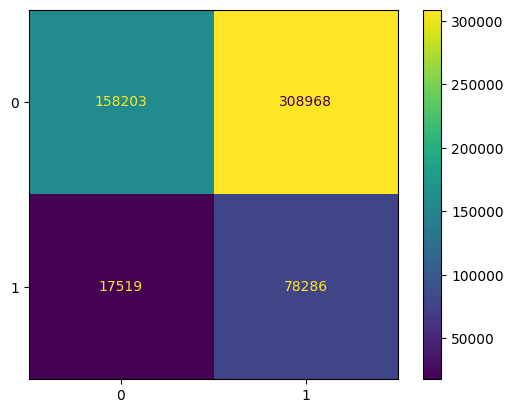

In [25]:
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cm = conf(y_NIBRS_test, y_NIBRS_pred)
disp = cmd(confusion_matrix=cm, display_labels=y_NIBRS_test)
disp.plot()

Cells (Values in the matrix):

Top-left (158,203): The number of true negatives (TN). These are instances where the model correctly predicted "no arrest" (True class = 0, Predicted = 0).

Top-right (308,968): The number of false positives (FP). These are instances where the model incorrectly predicted "arrest" when the actual label was "no arrest" (True class = 0, Predicted = 1).

Bottom-left (17,519): The number of false negatives (FN). These are instances where the model incorrectly predicted "no arrest" when the actual label was "arrest" (True class = 1, Predicted = 0).

Bottom-right (78,286): The number of true positives (TP). These are instances where the model correctly predicted "arrest" (True class = 1, Predicted = 1).

The matrix indicates that the model has a large number of true negatives (158,203) and true positives (78,286), which is good, but it also has a significant number of false positives (308,968) and false negatives (17,519).

The model is possibly struggling with correctly predicting the minority class (arrest) and may be biased towards predicting "no arrest" more often.
